In [9]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
import seaborn as sns

import os
import sctk 

In [7]:
sc.settings.set_figure_params(dpi=200)

# Functions

In [3]:
# This function selects the data for multiple slides from the spatial anndata object.
# Modified `select_slide` in cell2loc for multiple slides

# @param adata: anndata object with multiple spatial experiments
# @param s: list of selected slides
# @param s_col: column in adata.obs listing experiment name for each location

def select_multislide(adata, s, s_col='sample'):

    slides = adata[adata.obs[s_col].isin(s), :]
    s_keys = list(slides.uns['spatial'].keys())
    
    uns_dict = {}
    for ss in s:
        s_spatial=np.array(s_keys)[[ss in k for k in s_keys]][0]
        uns_dict[s_spatial]=slides.uns['spatial'][s_spatial]
    
    slides.uns['spatial'] = uns_dict

    return slides

In [4]:
import pickle

# save pickle file
def save_pkl(obj, file):
    with open(file, "wb") as tf:
        pickle.dump(obj, tf)

# read pickle file
def read_pkl(file):
    with open(file, "rb") as tf:
        obj = pickle.load(tf)

    return obj

# Read in anndata

In [5]:
# the anndata has "gene expression" in .X
# cell2location output is in .obsm['q05_cell_abundance_w_sf']
# kNN graph for UMAP/clustering was generated using cell2location output
adata_vis = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/visium_foetal_healthy-all_raw.h5ad')

AnnotationPalette={ 
    'Atrium - Left':'#eac075',
     'Atrium - Right':'#4c6b8a',
        'Ventricle - Compact - Left':'#e94bc7',
     'Ventricle - Compact - Right':'#ab1c3c',
     'Ventricle - Trabeculated - Left':'#fdba45',
     'Ventricle - Trabeculated - Right':'#2b9200',
        'SAnode':'#8A2BE2',
        'AVnode':'#FF8247',
    'VCS - Proximal':'#FFFF00',
        'VCS - Distal':'#7FFFD4',
        'Epicardium':'#01ccc8',
        'Endocardium':'#DC143C',
        'Endocardial cusion':'#ff7e97',
        'Great vessel':'#ff9b6e',
    'Ductus arteriosus':'#8a6800',
        'Coronary vessel':'#206601',
        'Adventitia - Coronary':'#CAFF70',
     'Adventitia - GV':'#005aa0',
        'AV ring':'#e478ff',
    'AV valves':'#ff665f',
    'Aortic valve':'#d2cb18',
    'Valve apparatus':'#83d7b3',
    'LN':'#9088ff',
}

adata_vis.obs['annotation_final'] = adata_vis.obs['annotation_final'].cat.reorder_categories(AnnotationPalette.keys())

adata_vis

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 39223 × 33562
    obs: 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'sangerID', 'Publication', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'status', 'cell2loc-map_group', 'JC_edit', 'sample_for_cell2loc', 'week', 'leiden', 'region_cluster', 'AtrialCardiomyocytesLeft', 'AtrialCardiomyocytesRight', 'VentricularCardiomyocytesLeftCompact', 'VentricularCardiomyocytesRightCompact', 'VentricularCardiomyocytesLeftTrabeculated', 'VentricularCardiomyocytesRightTrabeculated', 'SinoatrialNodeCardiomyocytes', 'AtrioventricularNodeCardiomyocytes', 'VentricularConductionSystemProximal', 'VentricularConductionSystemDistal', 'GreatVesselAdventitialFibroblasts'

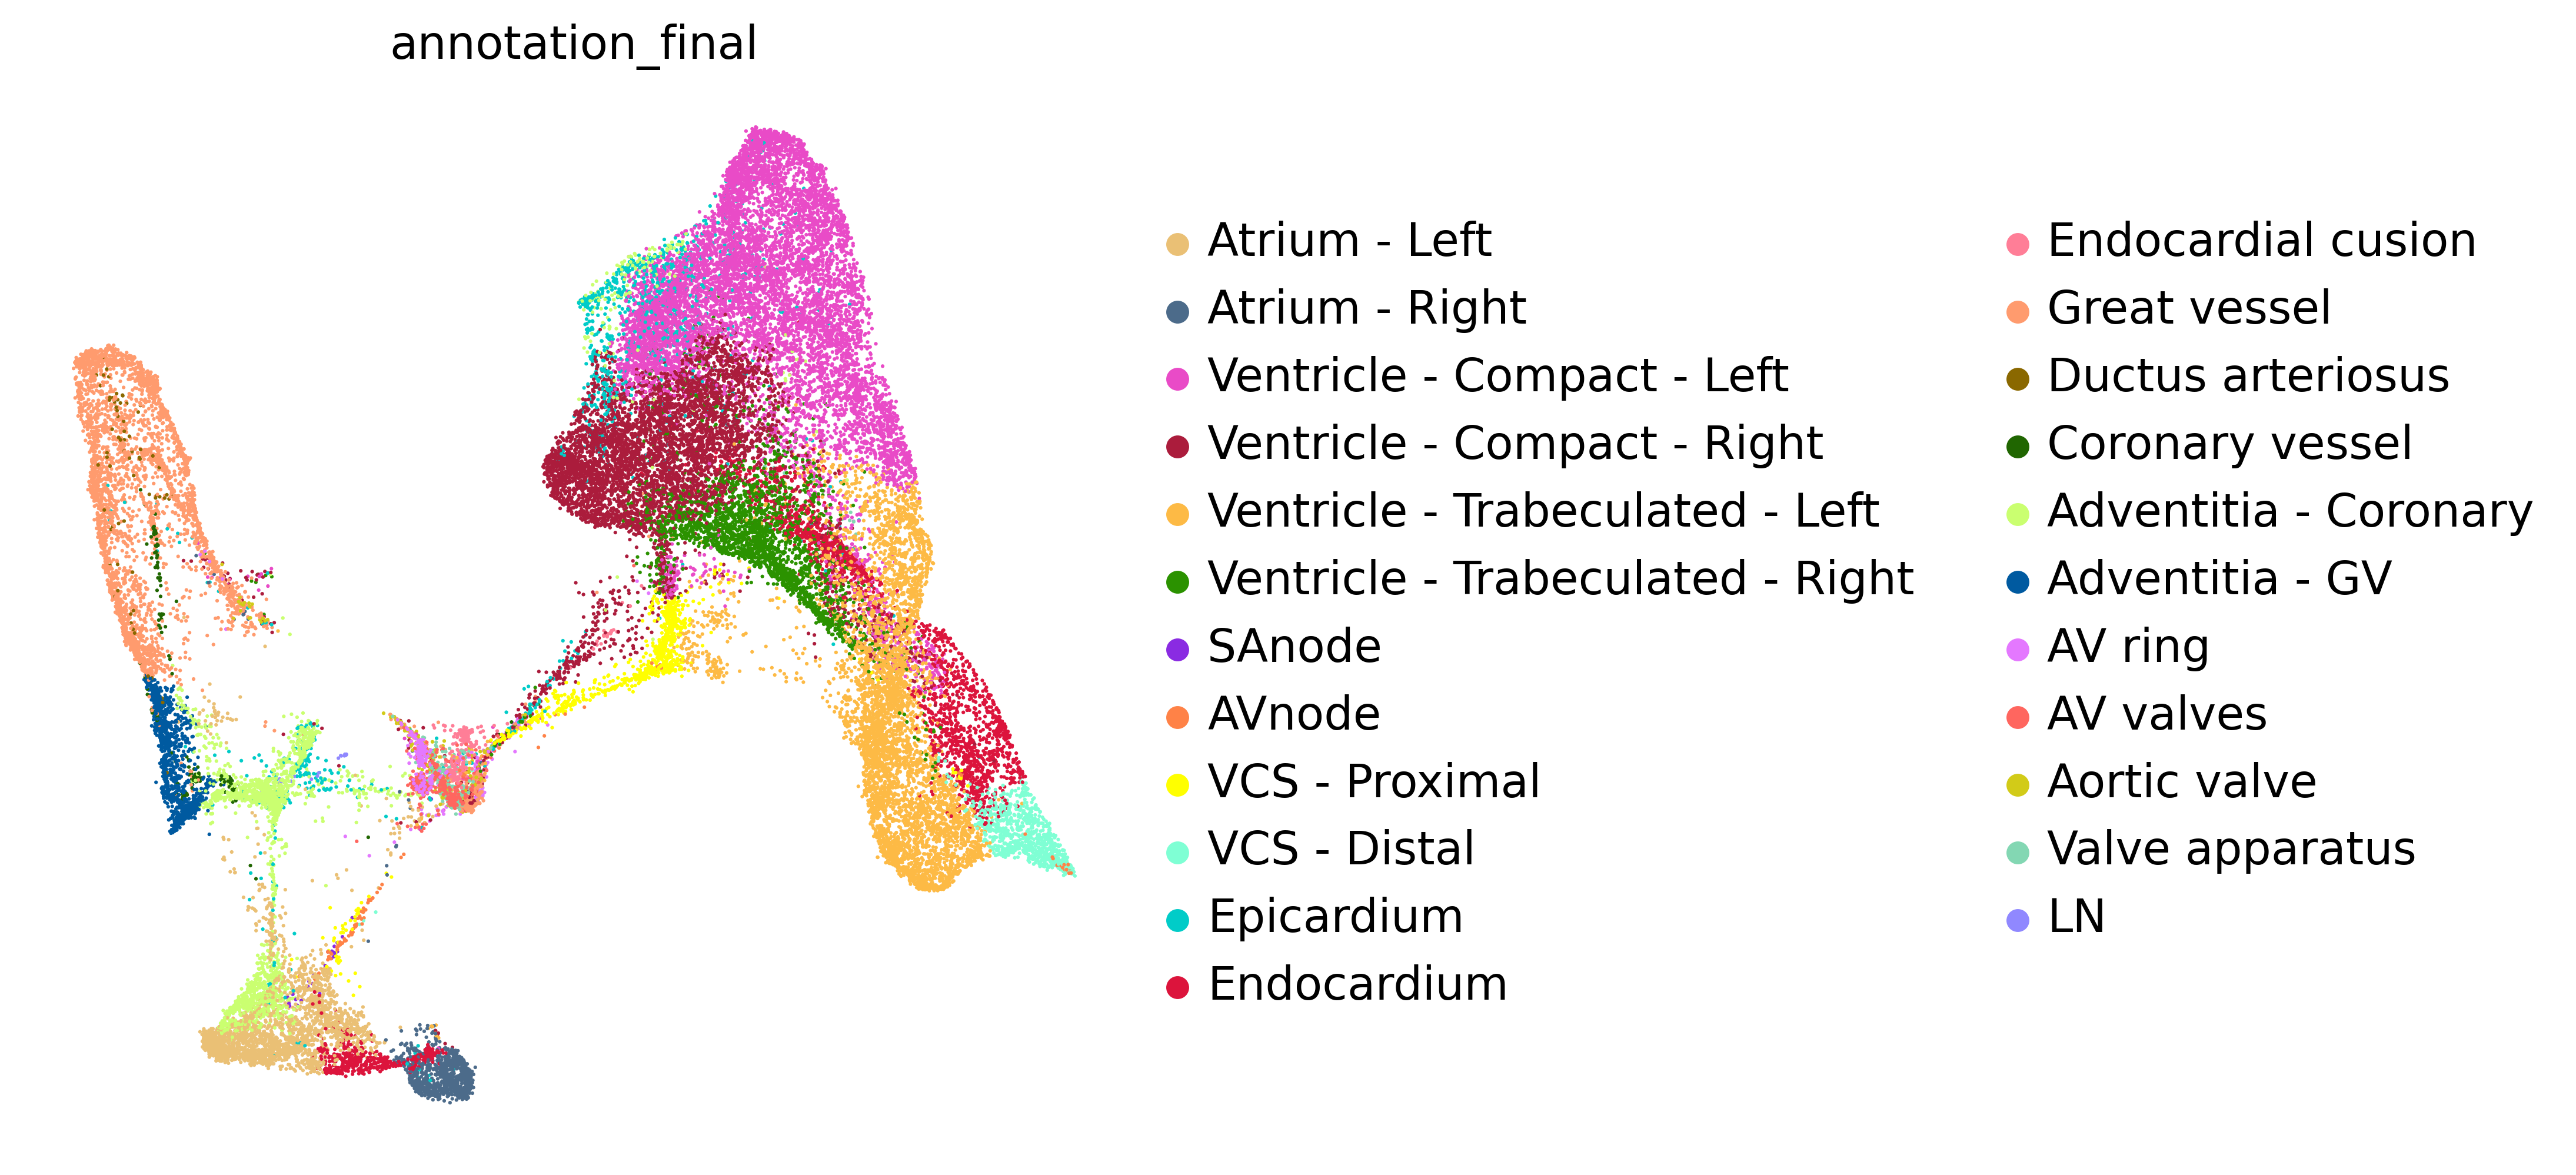

In [8]:
with mpl.rc_context({'axes.facecolor':  'white',
                     'figure.figsize': [6, 6]}):
    sc.pl.umap(adata_vis, color=['annotation_final'], size=5,
               color_map = 'RdPu', ncols = 3, wspace=0.3,
               legend_fontsize=14, frameon=False, palette=AnnotationPalette)

# Plot each niche separately

In [13]:
sctk.highlight(adata_vis,
             basis="umap",
             groupby="annotation_final",
             wspace=0.5, figsize=(5, 5), size=10,
            ncols=4)

In [12]:
?sctk.highlight

Signature:
sctk.highlight(
    adata,
    basis,
    groupby,
    groups=None,
    color=None,
    prefix_dict=None,
    hide_rest=False,
    figsize=(4, 4),
    hide_color='#F0F0F0',
    **kwargs,
)
Docstring: <no docstring>
File:      ~/my-conda-envs/cellpymc/lib/python3.7/site-packages/sctk/_plot.py
Type:      function
